# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Data Dictionary

**df** = It is dataframe which created from database "SeoulBikeData.csv"

**dict_rename_col** = It is a dictionary contains name of feature as key and corresponding replacement name as value.

**all_features** = It is name of all features in the database

**numerical_features** = It is a list that contains name of all numerical features in the database

**categorical_features** = It is a list that contains name of all categorical features of database

**calculate_iqr** = It is function to calculate uppper limit and lower limit of IQR(Inter quartile range)

**df['day']** = It is a series that contains day number extracted from date feature from df 

**df['month']** = It is a series that contains month number extracted from date feature from df 

**df['week_day']** = It is a series that contains week day number extracted from date feature from df

**convert_hour** = It is a function to convert hour of the day into four time slot

**remove_features** = It contains name of features to be removed from df

**add_cat_features** = It contains name of categorical features to be added to list of categorical_features

**df2** = It is a dataframe which is copy of df

**df2['time_slot']** = It is a series that contains name of time_slot converted to hours 

**season_demand** = It is a dataframe which contains name of season and total demand of rental bikes in that season.

**weekday_demand** = It is a dataframe which contains name of day of the week and total demand of rental bikes in that week day.

**month_demand** = It is a dataframe which contains name of number of the month and total demand of rental bikes in that month.

**hour_demand** = It is a dataframe which contains name of number of the hour and total demand of rental bikes in that hour.

**calc_vif** = It is a function to calculate VIF

**df1** = It is a dataframe which is copy of dataframe df

**dependent_var** : It is a list which  contains name of dependent feature

**independent_var** : It is a list which  contains name of independent feature

**X** = It is a dataframe which consist all values of features in list of  independent variable

**y** = It is a dataframe which consist all values of features in list of dependent variable










In [2]:
# importing essential libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing data into dataframe
file_path ='SeoulBikeData.csv'
df = pd.read_csv(file_path,encoding = "ISO-8859-1")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# checking top 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# checking last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#Checking for duplicated row

In [7]:
# checking for duplicated rows
len(df[df.duplicated()])

0

#Checking for null/NaN/Missing values and outliers

In [8]:
#cheking for null values in every column

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
#Generating descriptive statistics

df.describe([0.75,0.90,0.95,0.99])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
90%,1671.100000,21.000000,28.000000,86.000000,3.200000,2000.000000,21.000000,2.051000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
99%,2526.230000,23.000000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
#rename columns

dict_rename_col = {'Temperature(°C)':'temp',
                   'Humidity(%)':'humidity',
                   'Wind speed (m/s)':'wind_speed',
                   'Visibility (10m)':'visibility',
                   'Dew point temperature(°C)':'dew_point_temperature',
                   'Solar Radiation (MJ/m2)':'solar_radiation',
                   'Rainfall(mm)':'rainfall',
                   'Snowfall (cm)':'snowfall',
                   'Rented Bike Count':'rented_bike_count',
                   'Hour':'hour',
                   'Seasons':'seasons',
                   'Holiday':'holiday',
                   'Functioning Day':'functioning_day',
                   'Date':'date'



                   }

df = df.rename(columns = dict_rename_col)

In [11]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Various features in the list

In [12]:
#all features
all_features = list(df.columns)



#numerical features

numerical_features = list(df.describe().columns)
numerical_features.pop(1)


#categorical features

categorical_features = [col for col in all_features if col not in numerical_features]


print(f'Name of all features are as follows : {all_features}')
print(f'Name of numerical features are as follows : {numerical_features}')
print(f'Name of categorical features are as follows : {categorical_features}')






Name of all features are as follows : ['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day']
Name of numerical features are as follows : ['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Name of categorical features are as follows : ['date', 'hour', 'seasons', 'holiday', 'functioning_day']


#Checking distribution of dependent feature

           We can observe that data is postively skewed

1.1534281773679014


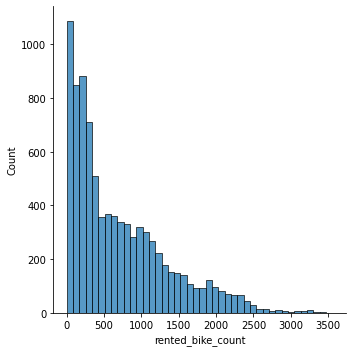

In [13]:
#distrution of dependent variable

sns.displot(df['rented_bike_count'])

print(df['rented_bike_count'].skew())

After giving log transformation,it can be seen that it is now treated

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


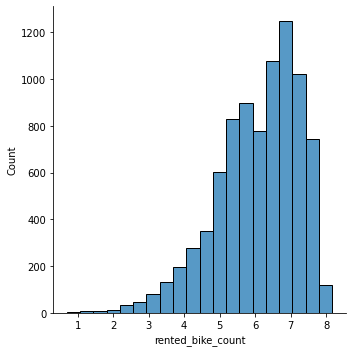

In [14]:
sns.displot(np.log(df['rented_bike_count']),bins = 20)

#Outlier Removal

In [15]:
def calculate_iqr(col):
  
  '''to calculate up_limit and lower limit of IQR'''
  
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  up_limit = 1.5 * iqr + q3
  low_limit = q1 - 1.5 * iqr

  return up_limit,low_limit,q1,q3

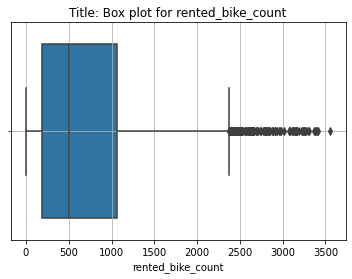

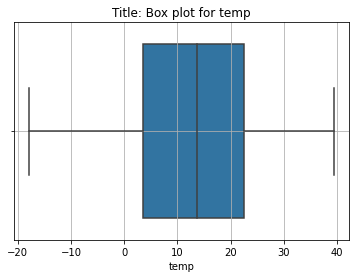

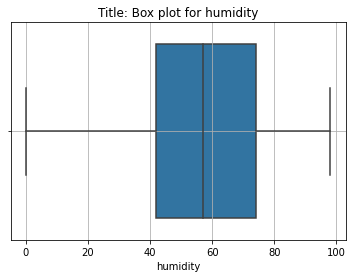

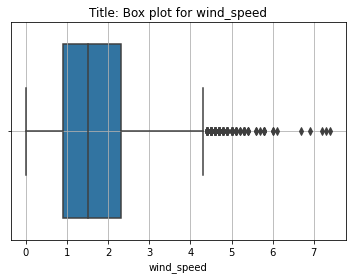

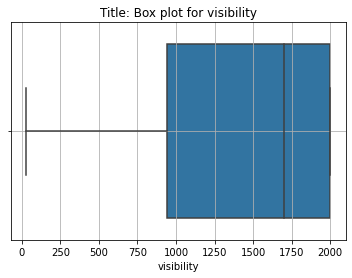

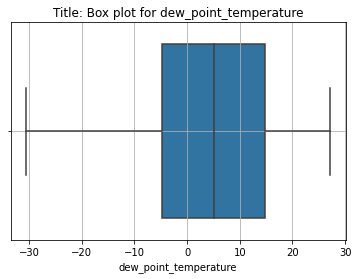

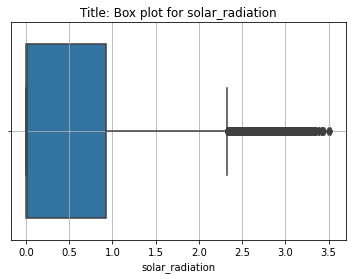

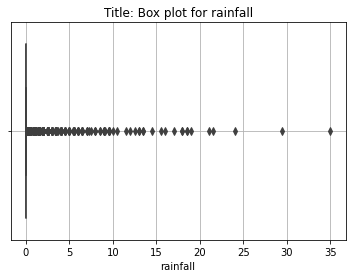

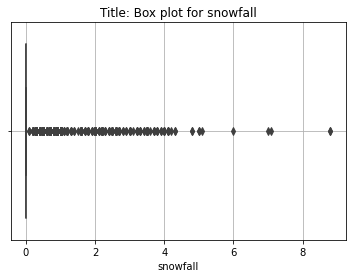

In [16]:
# plotting box plot to check outliers

for col in numerical_features:
  sns.boxplot(x=df[col])
  plt.title(f"Title: Box plot for {col}")
  plt.grid()
  plt.show()

Removing outlier from rented_bike_count feature

In [17]:
up_limit_rbc,low_limit_rbc,q1,q3 = calculate_iqr('rented_bike_count')

up_limit_rbc,low_limit_rbc,q1,q3

(2376.625, -1120.375, 191.0, 1065.25)

In [18]:
df['rented_bike_count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented_bike_count, dtype: float64

In [19]:
#df[df['rented_bike_count'] > up_limit_rbc]

In [20]:
df = df[df['rented_bike_count'] < up_limit_rbc]

Removing outlier from wind_speed column

In [21]:
up_limit_ws,low_limit_ws,q1,q3 = calculate_iqr('wind_speed')

up_limit_ws,low_limit_ws,q1,q3

(4.3999999999999995, -1.1999999999999997, 0.9, 2.3)

In [22]:
# no of outliers in wind_speed feature

len(df[df['wind_speed']>up_limit_ws])

161

In [23]:
df = df[df['wind_speed']<up_limit_ws]

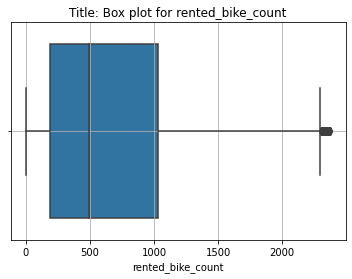

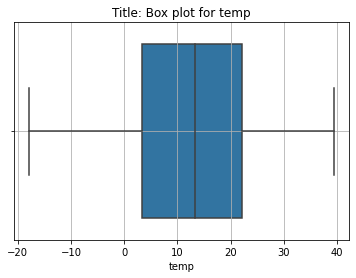

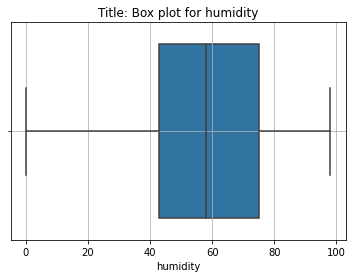

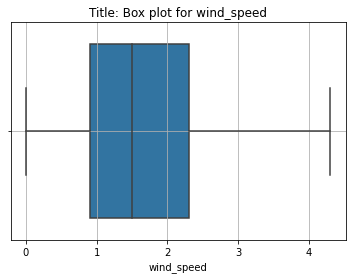

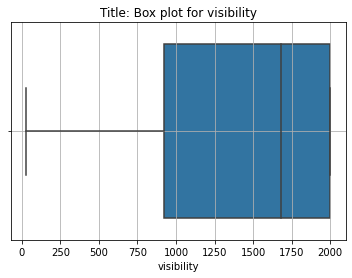

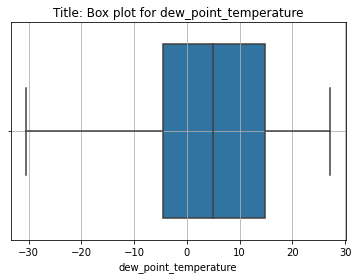

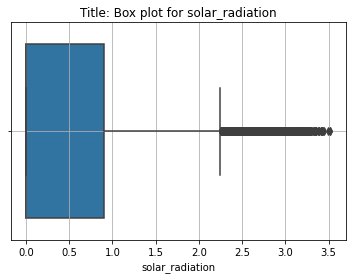

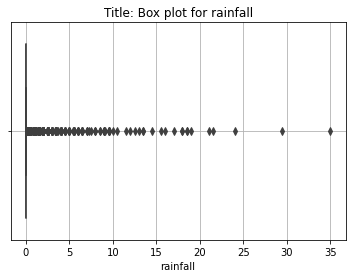

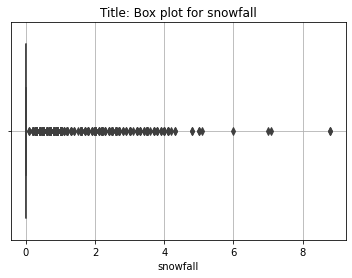

In [24]:
# plotting box plot after removing outliers

for col in numerical_features:
  sns.boxplot(x=df[col])
  plt.title(f"Title: Box plot for {col}")
  plt.grid()
  plt.show()

Removing outliers from solar radiation

In [25]:
up_limit_sr,low_limit_sr,q1,q3 = calculate_iqr('solar_radiation')

up_limit_sr,low_limit_sr,q1,q3

(2.25, -1.35, 0.0, 0.9)

In [26]:
# no of outliers in solar_radiation feature

len(df[df['solar_radiation']>up_limit_sr])

681

In [27]:
df['solar_radiation'].describe([0.025,0.75,0.90,0.95,0.975,0.99])

count    8441.000000
mean        0.556472
std         0.866590
min         0.000000
2.5%        0.000000
50%         0.000000
75%         0.900000
90%         2.050000
95%         2.550000
97.5%       2.890000
99%         3.170000
max         3.520000
Name: solar_radiation, dtype: float64

In [28]:
# trimming of data

df = df[df['solar_radiation']<up_limit_sr]

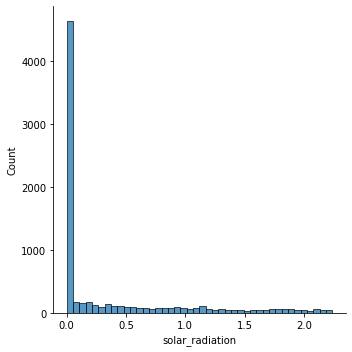

In [29]:
#distribution of solar_radiation feature
sns.displot(df['solar_radiation'])

Removing outliers from rainfall column

In [30]:
up_limit_rainfall,low_limit_rainfall,q1,q3 = calculate_iqr('rainfall')

up_limit_rainfall,low_limit_rainfall,q1,q3

(0.0, 0.0, 0.0, 0.0)

In [31]:
# no of outliers in rainfall feature

len(df[df['rainfall']>up_limit_rainfall])

512

In [32]:
#df = df[df['rainfall']<up_limit_rainfall]

In [33]:
df = df[df['rainfall']==up_limit_rainfall]

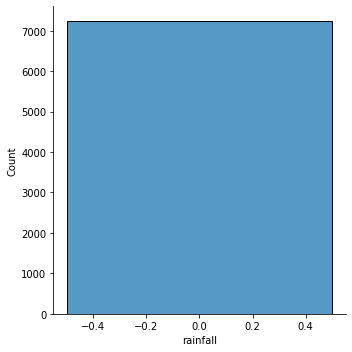

In [34]:
sns.displot(df['rainfall'])

Removing outliers snowfall

In [35]:
up_limit_snowfall,low_limit_snowfall,q1,q3 = calculate_iqr('snowfall')

up_limit_snowfall,low_limit_snowfall,q1,q3

(0.0, 0.0, 0.0, 0.0)

In [36]:
#df[df['snowfall']>up_limit_snowfall]

In [37]:
# trimming snowfall feature
df=df[df['snowfall']==up_limit_snowfall]

#Feature engineering

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   6841 non-null   object 
 1   rented_bike_count      6841 non-null   int64  
 2   hour                   6841 non-null   int64  
 3   temp                   6841 non-null   float64
 4   humidity               6841 non-null   int64  
 5   wind_speed             6841 non-null   float64
 6   visibility             6841 non-null   int64  
 7   dew_point_temperature  6841 non-null   float64
 8   solar_radiation        6841 non-null   float64
 9   rainfall               6841 non-null   float64
 10  snowfall               6841 non-null   float64
 11  seasons                6841 non-null   object 
 12  holiday                6841 non-null   object 
 13  functioning_day        6841 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 801.7+ 

In [39]:

# convert the 'Date' column to datetime format
df['date']= pd.to_datetime(df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
#extracting day,month,week day and month and creating new column respectively
df['day'] = df['date'].dt.day
df['month'] =df['date'].dt.month
df['week_day'] = df['date'].dt.weekday



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [41]:
df.drop(columns='date',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day,month,week_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,3
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,3
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,3


In [43]:
#hour column has too many categories
# We must convert hour to morning,noon,evening,night

df['hour'].value_counts()

22    334
23    329
1     328
4     324
0     323
2     323
7     322
5     320
21    318
8     317
17    310
20    310
9     309
3     309
6     308
19    292
16    282
10    272
18    235
15    222
11    218
14    185
12    178
13    173
Name: hour, dtype: int64

In [44]:
def convert_hour(input_hour):

  '''convert hour of the day into four time slot''' 


  if 5 <= input_hour <12:
    return 'morning'
  elif 12<= input_hour < 17:
    return 'afternoon'
  elif 17 <= input_hour < 22:
    return 'evening'
  else:
    return 'night'

In [45]:
#df['time_slot'] = df['hour'].apply(convert_hour)

In [46]:
#df['time_slot'].value_counts()

In [47]:
#checking temperature columns
#it is a continuous feature

df.temp.value_counts()

 19.1    35
 7.6     34
 5.1     31
 20.7    31
 24.2    29
         ..
-13.3     1
 34.2     1
 35.9     1
 36.0     1
 37.2     1
Name: temp, Length: 516, dtype: int64

In [48]:
#checking humidity feature

df.humidity.value_counts()

53    147
63    142
57    137
60    136
55    134
     ... 
14      7
19      6
12      1
11      1
13      1
Name: humidity, Length: 89, dtype: int64

In [49]:
#checking wind_speed feature

df.wind_speed.value_counts()

0.8    341
1.1    340
0.9    337
1.2    333
1.0    327
1.4    298
0.6    284
1.5    284
1.3    276
1.6    267
0.7    261
1.7    249
0.5    222
2.0    221
1.8    218
1.9    179
2.2    167
2.1    165
0.4    164
2.3    160
0.3    140
2.4    137
2.6    136
2.5    121
2.8    121
2.7    114
2.9    100
3.0     85
3.2     84
3.1     80
0.2     77
3.3     70
3.4     62
0.0     61
3.5     57
3.7     53
0.1     45
3.6     39
3.8     35
3.9     32
4.1     31
4.0     25
4.3     22
4.2     21
Name: wind_speed, dtype: int64

In [50]:
#checking visibility feature

df.visibility.value_counts()

2000    1902
1995      28
1989      25
1996      23
1999      23
        ... 
613        1
676        1
439        1
395        1
1566       1
Name: visibility, Length: 1654, dtype: int64

In [51]:
#checking dew_point_temperature feature

df.dew_point_temperature.value_counts()

 0.0     46
 21.8    36
 8.9     30
 2.2     30
 21.2    28
         ..
 25.8     1
 25.9     1
 25.7     1
 25.6     1
-24.7     1
Name: dew_point_temperature, Length: 513, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      6841 non-null   int64  
 1   hour                   6841 non-null   int64  
 2   temp                   6841 non-null   float64
 3   humidity               6841 non-null   int64  
 4   wind_speed             6841 non-null   float64
 5   visibility             6841 non-null   int64  
 6   dew_point_temperature  6841 non-null   float64
 7   solar_radiation        6841 non-null   float64
 8   rainfall               6841 non-null   float64
 9   snowfall               6841 non-null   float64
 10  seasons                6841 non-null   object 
 11  holiday                6841 non-null   object 
 12  functioning_day        6841 non-null   object 
 13  day                    6841 non-null   int64  
 14  month                  6841 non-null   int64  
 15  week

In [53]:
#checking solar_radiation feature

df.solar_radiation.value_counts()

df.drop(columns='solar_radiation',inplace=True)

In [54]:
#checking rainfall feature

df.rainfall.value_counts()

#all values are 0, there it will be better to drop this column
df.drop(columns='rainfall',inplace=True)

In [55]:
#checking snowfall feature

df.snowfall.value_counts()

#all values are 0, there it will be better to drop this column
df.drop(columns='snowfall',inplace=True)

In [56]:
#checking seasons feature

df.seasons.value_counts()

Autumn    1861
Winter    1682
Spring    1674
Summer    1624
Name: seasons, dtype: int64

In [57]:
#checking holiday feature

df.holiday.value_counts()

No Holiday    6499
Holiday        342
Name: holiday, dtype: int64

In [58]:
#checking functioning_day feature

df.functioning_day.value_counts()




Yes    6583
No      258
Name: functioning_day, dtype: int64

#Univarite analyisis

In [59]:
remove_features = ['snowfall','rainfall','solar_radiation']

numerical_features = [col for col in numerical_features if col not in remove_features]

In [60]:
numerical_features

['rented_bike_count',
 'temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature']

In [61]:
add_cat_features = ['day','month','week_day']
categorical_features.extend(add_cat_features)

In [62]:
categorical_features

['date',
 'hour',
 'seasons',
 'holiday',
 'functioning_day',
 'day',
 'month',
 'week_day']

In [63]:
categorical_features
categorical_features.pop(0)

'date'

In [64]:
#categorical_features.pop(3)

In [65]:
#categorical_features.pop(2)

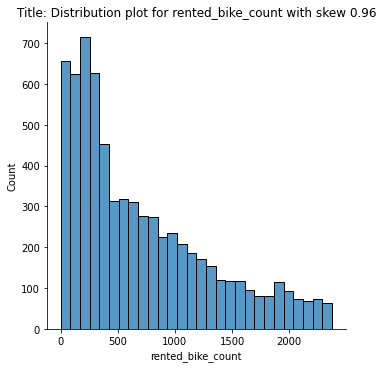

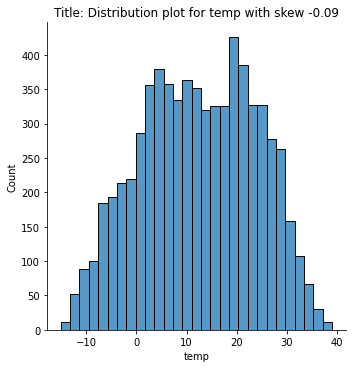

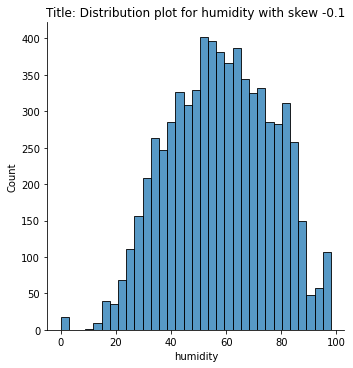

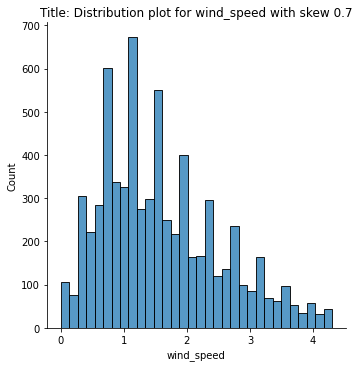

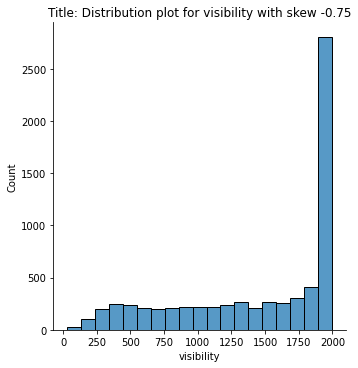

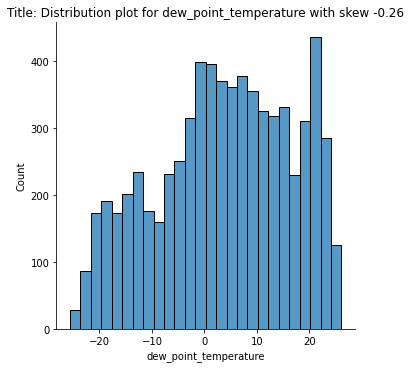

In [66]:
#checking distribution of all numerical features

for col in numerical_features:
  sns.displot(df[col])
  plt.title(f'Title: Distribution plot for {col} with skew {round(df[col].skew(),2)}')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


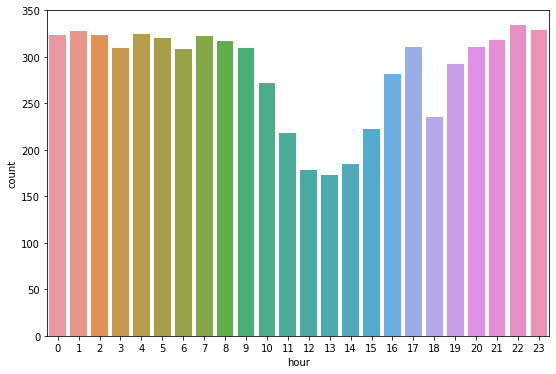

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


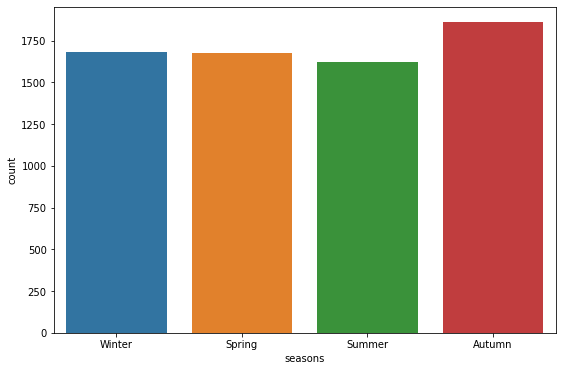

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


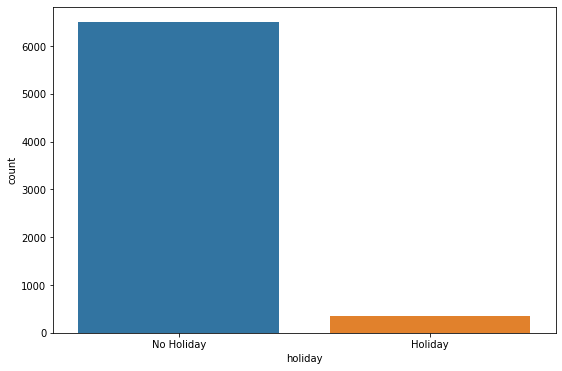

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


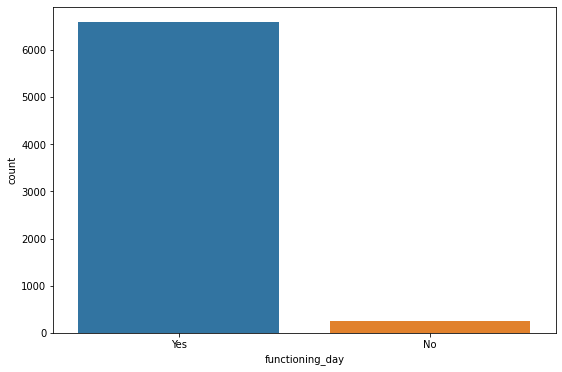

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


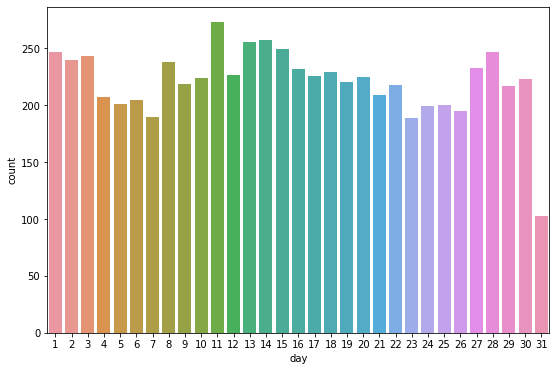

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


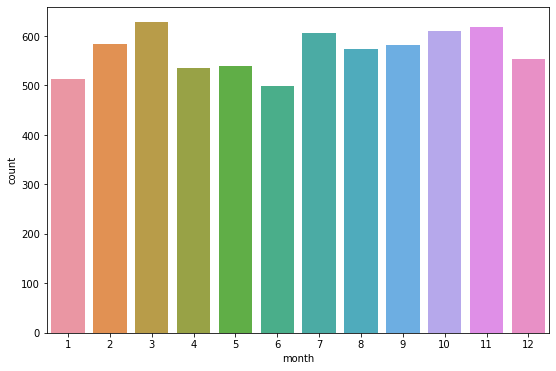

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


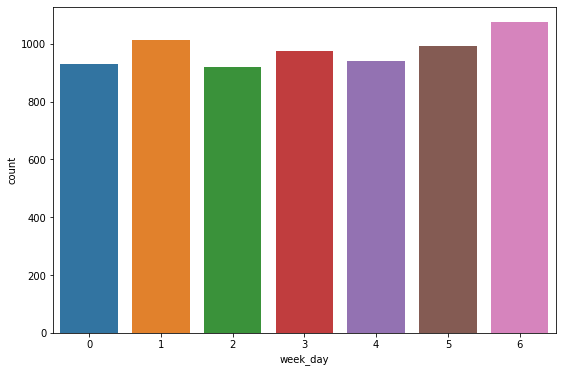

In [67]:
#check distribution of all categorical features

for col in categorical_features:
  plt.figure(figsize=(9,6))
  sns.countplot(df[col])
  plt.show()

In [68]:
#df.drop(columns=['functioning_day','holiday'],inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      6841 non-null   int64  
 1   hour                   6841 non-null   int64  
 2   temp                   6841 non-null   float64
 3   humidity               6841 non-null   int64  
 4   wind_speed             6841 non-null   float64
 5   visibility             6841 non-null   int64  
 6   dew_point_temperature  6841 non-null   float64
 7   seasons                6841 non-null   object 
 8   holiday                6841 non-null   object 
 9   functioning_day        6841 non-null   object 
 10  day                    6841 non-null   int64  
 11  month                  6841 non-null   int64  
 12  week_day               6841 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1006.3+ KB


#Bivariate analysis

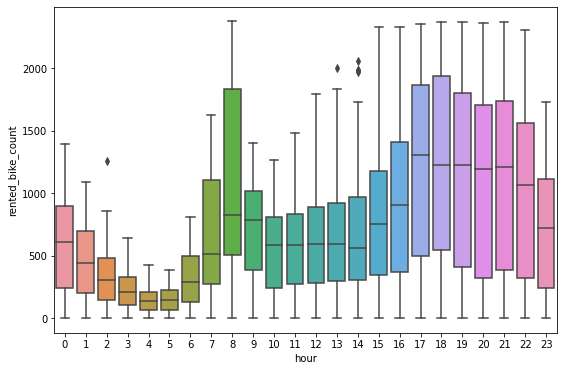

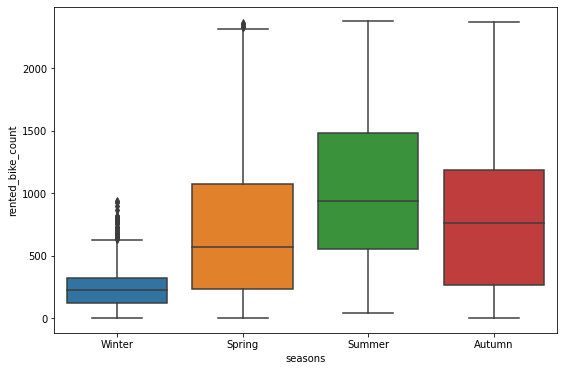

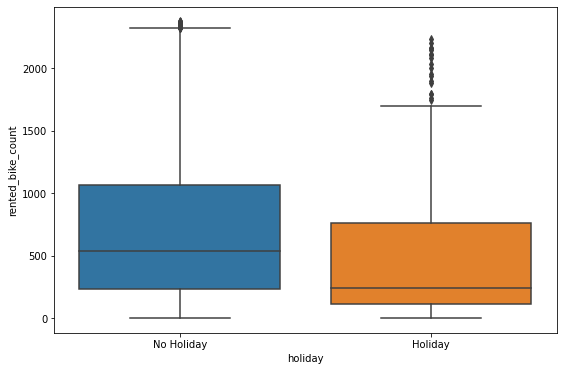

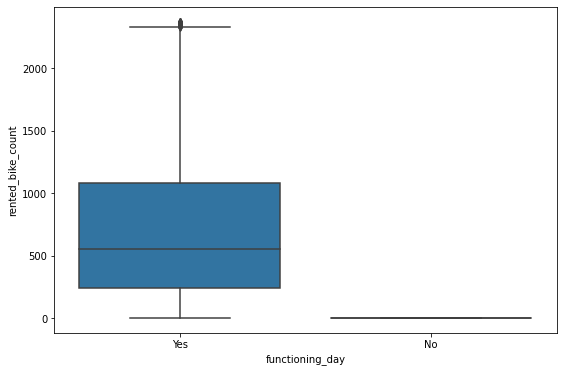

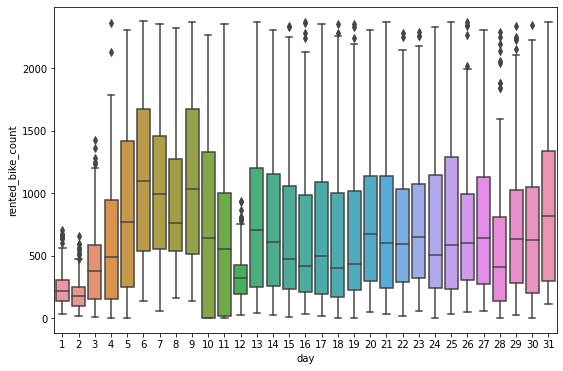

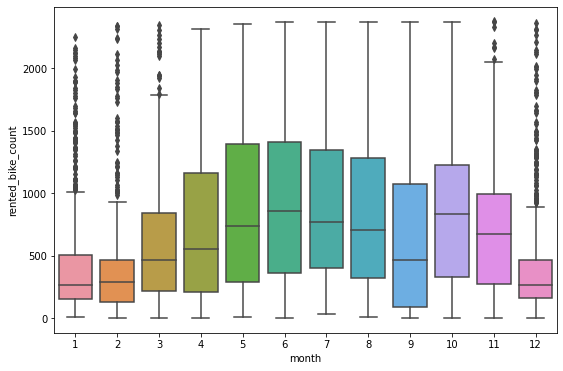

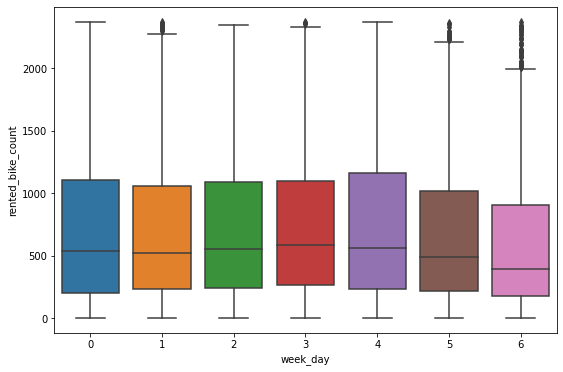

In [70]:
#check relation between categorical features and dependent variable

for col in categorical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=df[col],y='rented_bike_count',data=df)
  plt.show()

#Multivariate analysis

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      6841 non-null   int64  
 1   hour                   6841 non-null   int64  
 2   temp                   6841 non-null   float64
 3   humidity               6841 non-null   int64  
 4   wind_speed             6841 non-null   float64
 5   visibility             6841 non-null   int64  
 6   dew_point_temperature  6841 non-null   float64
 7   seasons                6841 non-null   object 
 8   holiday                6841 non-null   object 
 9   functioning_day        6841 non-null   object 
 10  day                    6841 non-null   int64  
 11  month                  6841 non-null   int64  
 12  week_day               6841 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1006.3+ KB


In [72]:
#creating copy of df to do analysis
df2=df.copy()

In [73]:
df2.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,seasons,holiday,functioning_day,day,month,week_day
0,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes,12,1,3
1,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes,12,1,3
2,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes,12,1,3
3,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes,12,1,3
4,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes,12,1,3


In [74]:
df2['time_slot'] = df2['hour'].apply(convert_hour)

No of bikes rented according to time slot

      Findings : 
      1. Bikes are mostly rented at night time
      2. Second most time slot at which bike is rented.
      3. At afternoon least no of bikes are rented

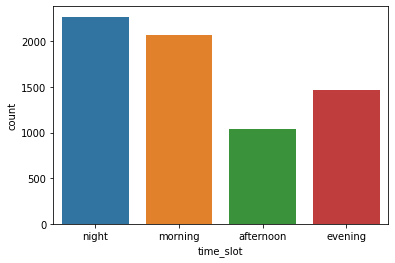

In [75]:
sns.countplot(data = df2,x='time_slot')

Season and demand of bike

         It can be seen that demand of bike is in following order:
         Summer > Autumn > Spring > Winter
        


In [76]:
season_demand = pd.DataFrame(data=df2.groupby('seasons')['rented_bike_count'].sum().reset_index())
season_demand


,seasons,rented_bike_count
0,Autumn,1498434
1,Spring,1202304
2,Summer,1700080
3,Winter,404912


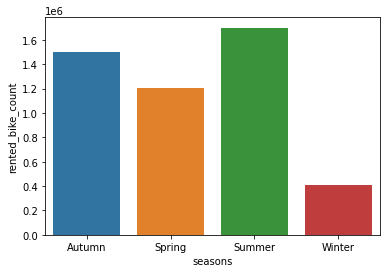

In [77]:
sns.barplot(data = season_demand,x = 'seasons',y='rented_bike_count')

Relation between temperature and bike demand

Following are the relationship between temperature and demand of rental bike:
1. It can be seen that demand of bike increases with increase in temperature
2. When temperature is high demand for bike rental is more during evening.
3. When temperature is low demand for bike rental is during morning and night.      
        


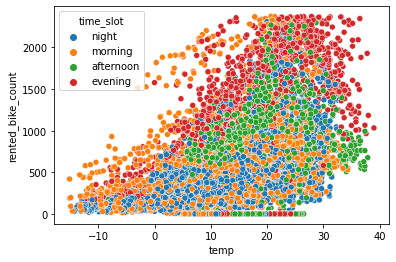

In [78]:
sns.scatterplot(data = df2,x='temp',y='rented_bike_count',hue = 'time_slot' )

In [79]:
month_temp = pd.DataFrame(data=df2.groupby('month').agg(mean_temperature = ('temp','mean'),mean_bike_demand =('rented_bike_count','mean')).reset_index())
month_temp

,month,mean_temperature,mean_bike_demand
0,1,4.981287,448.350877
1,2,5.422127,393.977702
2,3,10.841083,586.186306
3,4,12.556636,723.340187
4,5,15.206679,892.528757
5,6,18.084739,946.086345
6,7,22.532949,934.049423
7,8,20.220035,866.569686
8,9,16.765979,655.450172
9,10,12.147627,859.605565


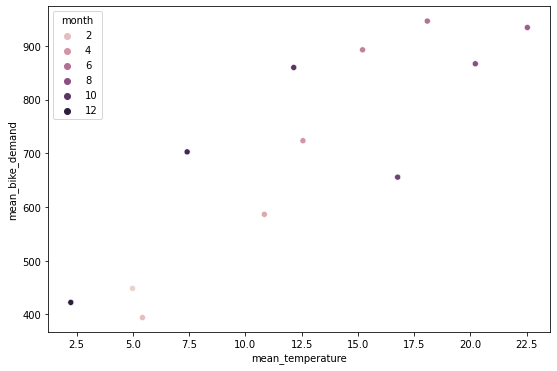

In [80]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=month_temp,y = 'mean_bike_demand',x = 'mean_temperature',hue = 'month')

Relationship between week day and demand for bike

It can be seen that almost at any day of the week demand is almost same

In [81]:
weekday_demand = pd.DataFrame(data=df2.groupby('week_day')['rented_bike_count'].sum().reset_index())
weekday_demand


,week_day,rented_bike_count
0,0,669733
1,1,711266
2,2,673117
3,3,720218
4,4,698451
5,5,675826
6,6,657119


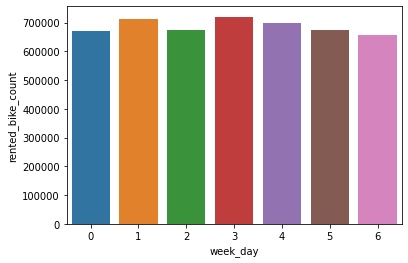

In [82]:
sns.barplot(data = weekday_demand,x = 'week_day',y='rented_bike_count')

Relationship between month and bike demand

 Key finding related to monthly bike demand:
 1. Rental bike demand is low on January, February and December.
 2. Rental bike demand is very high between May to August. 

In [83]:
month_demand = pd.DataFrame(data=df2.groupby('month')['rented_bike_count'].sum().reset_index())
month_demand

,month,rented_bike_count
0,1,230004
1,2,229689
2,3,368125
3,4,386987
4,5,481073
5,6,471151
6,7,566968
7,8,497411
8,9,381472
9,10,525219


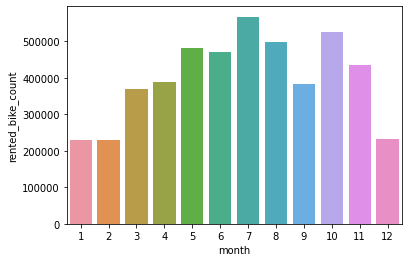

In [84]:
sns.barplot(data = month_demand,x = 'month',y='rented_bike_count')

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      6841 non-null   int64  
 1   hour                   6841 non-null   int64  
 2   temp                   6841 non-null   float64
 3   humidity               6841 non-null   int64  
 4   wind_speed             6841 non-null   float64
 5   visibility             6841 non-null   int64  
 6   dew_point_temperature  6841 non-null   float64
 7   seasons                6841 non-null   object 
 8   holiday                6841 non-null   object 
 9   functioning_day        6841 non-null   object 
 10  day                    6841 non-null   int64  
 11  month                  6841 non-null   int64  
 12  week_day               6841 non-null   int64  
 13  time_slot              6841 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 1.0+ MB

Relationship between visibilty and bike demand

There is no clear trend between visibility and bike demand 

In [86]:
df2['visibility'].value_counts()

2000    1902
1995      28
1989      25
1996      23
1999      23
        ... 
613        1
676        1
439        1
395        1
1566       1
Name: visibility, Length: 1654, dtype: int64

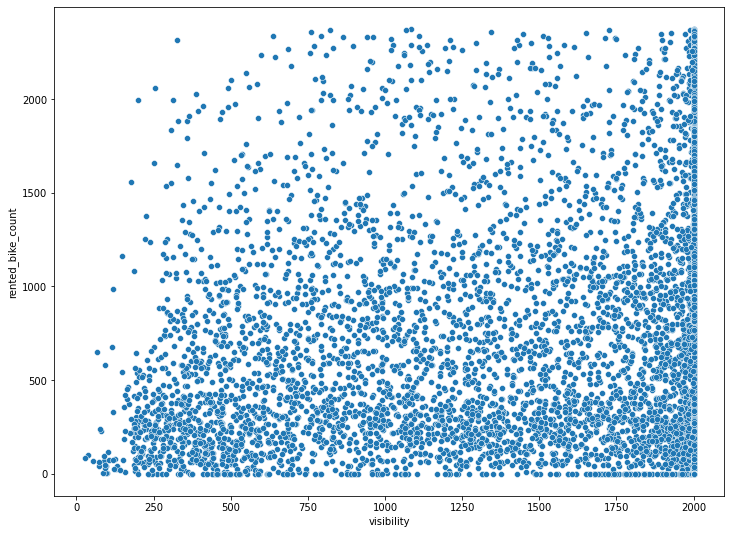

In [87]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = df2 , x='visibility',y ='rented_bike_count')

Relationship between wind_speed and bike demand

It can be seen that bike demand usually lowers when wind speed is higher.

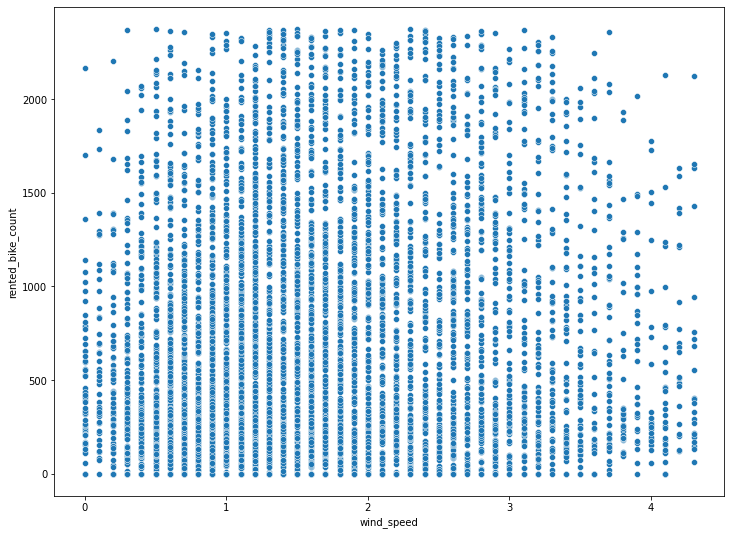

In [88]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = df2 , x='wind_speed',y ='rented_bike_count')

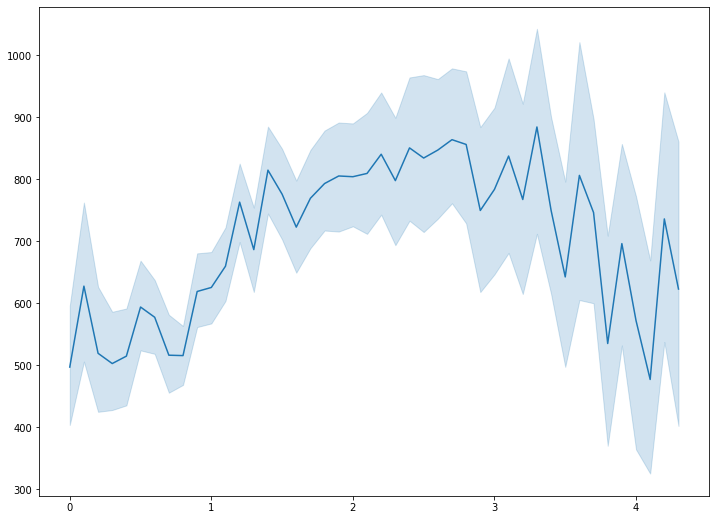

In [89]:
plt.figure(figsize=(12,9))
sns.lineplot(data = df2 , x=df['wind_speed'].values,y =df['rented_bike_count'].values)

Relationship between hour of the day and bike demand

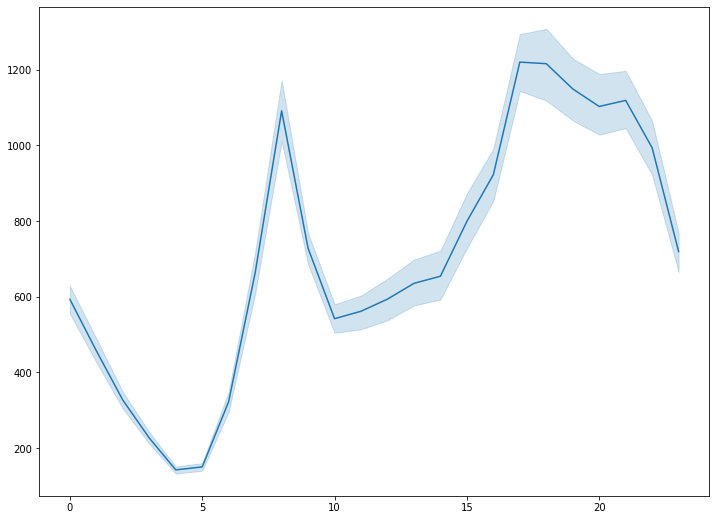

In [90]:
plt.figure(figsize=(12,9))
sns.lineplot(data = df2 , x=df['hour'].values,y =df['rented_bike_count'].values)

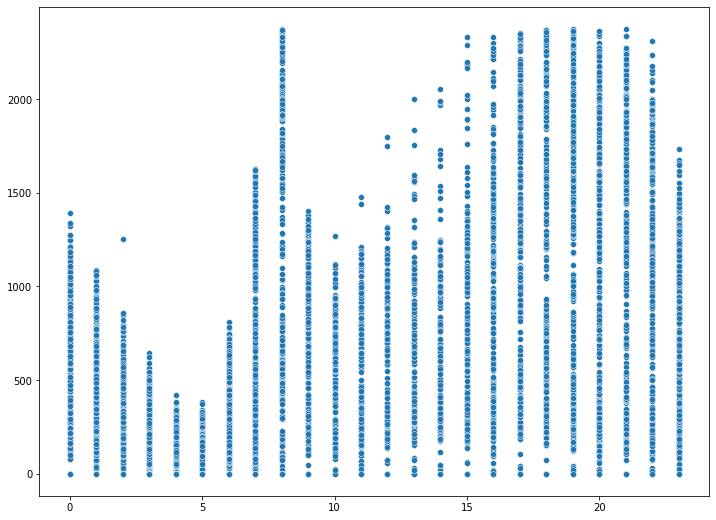

In [91]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = df2 , x=df['hour'].values,y =df['rented_bike_count'].values)

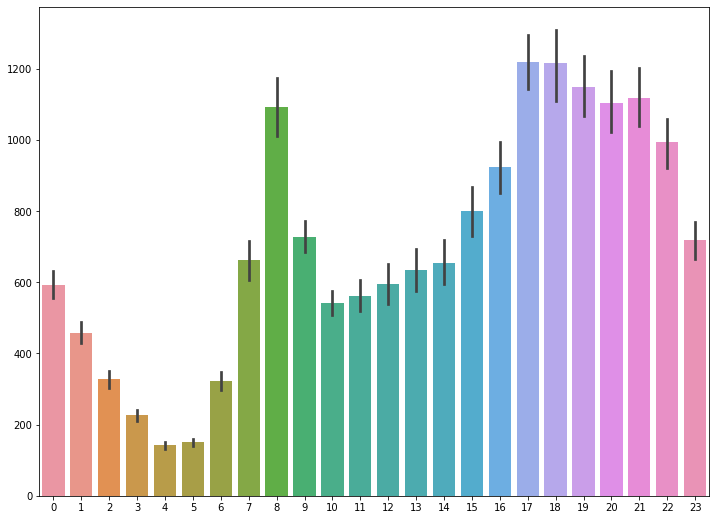

In [92]:
plt.figure(figsize=(12,9))
sns.barplot(data = df2 , x=df['hour'].values,y =df['rented_bike_count'].values)

In [93]:
hour_demand = pd.DataFrame(data=df2.groupby('hour')['rented_bike_count'].sum().reset_index())
hour_demand

,hour,rented_bike_count
0,0,191648
1,1,150003
2,2,105635
3,3,70108
4,4,46235
5,5,48162
6,6,99486
7,7,213521
8,8,345948
9,9,224994


It can be seen that bike demand rises after 5 AM and peaks at 8 AM, then again rises after 2 PM and peaks at 5PM then demand remain significantly above average demand 6PM and 11PM

That means in this 11 hours of a day bike demand is most.

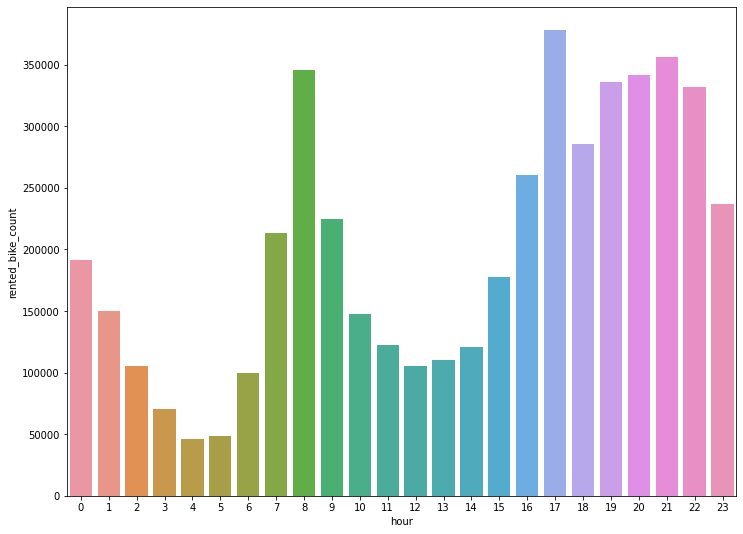

In [94]:
plt.figure(figsize=(12,9))
sns.barplot(data = hour_demand , x='hour',y ='rented_bike_count')

#Checking correlation

In [95]:
numerical_features

['rented_bike_count',
 'temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature']

In [96]:
df.corr()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,day,month,week_day
rented_bike_count,1.000000,0.428133,0.556930,-0.079947,0.125332,0.134754,0.430806,0.072702,0.081924,-0.044838
hour,0.428133,1.000000,0.098287,-0.252365,0.305103,0.084985,-0.018785,-0.003597,0.003949,0.002709
temp,0.556930,0.098287,1.000000,0.261314,-0.041162,0.024883,0.927973,0.126660,0.035598,-0.025716
humidity,-0.079947,-0.252365,0.261314,1.000000,-0.296497,-0.477336,0.590533,0.016041,0.007377,-0.005088
wind_speed,0.125332,0.305103,-0.041162,-0.296497,1.000000,0.138939,-0.154974,-0.050509,-0.060046,-0.023570
visibility,0.134754,0.084985,0.024883,-0.477336,0.138939,1.000000,-0.150090,-0.106884,0.133282,0.023702
dew_point_temperature,0.430806,-0.018785,0.927973,0.590533,-0.154974,-0.150090,1.000000,0.110010,0.034852,-0.029072
day,0.072702,-0.003597,0.126660,0.016041,-0.050509,-0.106884,0.110010,1.000000,0.035417,-0.013301
month,0.081924,0.003949,0.035598,0.007377,-0.060046,0.133282,0.034852,0.035417,1.000000,-0.003530
week_day,-0.044838,0.002709,-0.025716,-0.005088,-0.023570,0.023702,-0.029072,-0.013301,-0.003530,1.000000


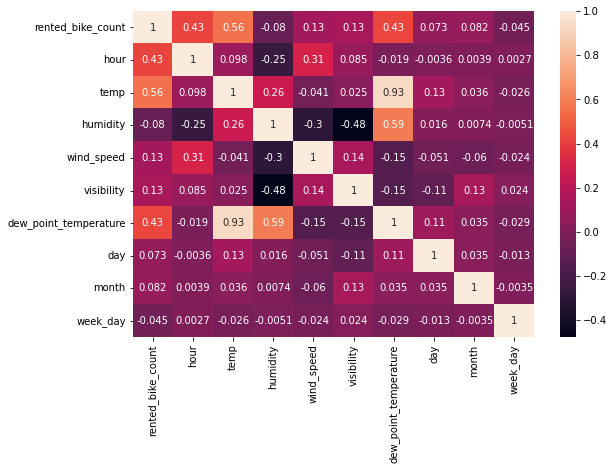

In [97]:
#heatmap to visualise correlation
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot = True)

In [98]:
#removing dew point because of 96% correlation
df.drop(columns='dew_point_temperature',inplace=True)

In [99]:
#removing hour because of 96% correlation
#df.drop(columns='hour',inplace=True)

#VIF analysis

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  6841 non-null   int64  
 1   hour               6841 non-null   int64  
 2   temp               6841 non-null   float64
 3   humidity           6841 non-null   int64  
 4   wind_speed         6841 non-null   float64
 5   visibility         6841 non-null   int64  
 6   seasons            6841 non-null   object 
 7   holiday            6841 non-null   object 
 8   functioning_day    6841 non-null   object 
 9   day                6841 non-null   int64  
 10  month              6841 non-null   int64  
 11  week_day           6841 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 952.8+ KB


In [101]:
all_features=list(df.columns)
all_features

['rented_bike_count',
 'hour',
 'temp',
 'humidity',
 'wind_speed',
 'visibility',
 'seasons',
 'holiday',
 'functioning_day',
 'day',
 'month',
 'week_day']

In [102]:
#categorical_features.pop(0)

In [103]:
numerical_features

['rented_bike_count',
 'temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature']

In [104]:
numerical_features
numerical_features.pop(5)

'dew_point_temperature'

In [105]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [106]:
# check multicollinearity, VIF must be less than 10

calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,hour,3.681365
1,temp,2.471182
2,humidity,6.461812
3,wind_speed,4.140718
4,visibility,5.899979
5,day,3.827524
6,month,4.656707
7,week_day,3.172458


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  6841 non-null   int64  
 1   hour               6841 non-null   int64  
 2   temp               6841 non-null   float64
 3   humidity           6841 non-null   int64  
 4   wind_speed         6841 non-null   float64
 5   visibility         6841 non-null   int64  
 6   seasons            6841 non-null   object 
 7   holiday            6841 non-null   object 
 8   functioning_day    6841 non-null   object 
 9   day                6841 non-null   int64  
 10  month              6841 non-null   int64  
 11  week_day           6841 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 952.8+ KB


In [108]:
print(len(numerical_features))
print(len(categorical_features))

5
7


In [109]:
numerical_features

['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility']

In [110]:
categorical_features

['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'week_day']

#Categorical encoding

In [111]:
df1=df.copy()

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  6841 non-null   int64  
 1   hour               6841 non-null   int64  
 2   temp               6841 non-null   float64
 3   humidity           6841 non-null   int64  
 4   wind_speed         6841 non-null   float64
 5   visibility         6841 non-null   int64  
 6   seasons            6841 non-null   object 
 7   holiday            6841 non-null   object 
 8   functioning_day    6841 non-null   object 
 9   day                6841 non-null   int64  
 10  month              6841 non-null   int64  
 11  week_day           6841 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 952.8+ KB


In [113]:
df1.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,seasons,holiday,functioning_day,day,month,week_day
0,254,0,-5.2,37,2.2,2000,Winter,No Holiday,Yes,12,1,3
1,204,1,-5.5,38,0.8,2000,Winter,No Holiday,Yes,12,1,3
2,173,2,-6.0,39,1.0,2000,Winter,No Holiday,Yes,12,1,3
3,107,3,-6.2,40,0.9,2000,Winter,No Holiday,Yes,12,1,3
4,78,4,-6.0,36,2.3,2000,Winter,No Holiday,Yes,12,1,3


In [114]:
df1.tail()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,seasons,holiday,functioning_day,day,month,week_day
8755,1003,19,4.2,34,2.6,1894,Autumn,No Holiday,Yes,30,11,4
8756,764,20,3.4,37,2.3,2000,Autumn,No Holiday,Yes,30,11,4
8757,694,21,2.6,39,0.3,1968,Autumn,No Holiday,Yes,30,11,4
8758,712,22,2.1,41,1.0,1859,Autumn,No Holiday,Yes,30,11,4
8759,584,23,1.9,43,1.3,1909,Autumn,No Holiday,Yes,30,11,4


In [115]:
df1=df1.reset_index()

In [116]:
df1.drop(columns='index',inplace=True)

In [117]:
df1.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,seasons,holiday,functioning_day,day,month,week_day
0,254,0,-5.2,37,2.2,2000,Winter,No Holiday,Yes,12,1,3
1,204,1,-5.5,38,0.8,2000,Winter,No Holiday,Yes,12,1,3
2,173,2,-6.0,39,1.0,2000,Winter,No Holiday,Yes,12,1,3
3,107,3,-6.2,40,0.9,2000,Winter,No Holiday,Yes,12,1,3
4,78,4,-6.0,36,2.3,2000,Winter,No Holiday,Yes,12,1,3


In [118]:
df1.tail()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,seasons,holiday,functioning_day,day,month,week_day
6836,1003,19,4.2,34,2.6,1894,Autumn,No Holiday,Yes,30,11,4
6837,764,20,3.4,37,2.3,2000,Autumn,No Holiday,Yes,30,11,4
6838,694,21,2.6,39,0.3,1968,Autumn,No Holiday,Yes,30,11,4
6839,712,22,2.1,41,1.0,1859,Autumn,No Holiday,Yes,30,11,4
6840,584,23,1.9,43,1.3,1909,Autumn,No Holiday,Yes,30,11,4


In [119]:
df1 = pd.get_dummies(data = df1,columns =categorical_features)

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841 entries, 0 to 6840
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rented_bike_count    6841 non-null   int64  
 1   temp                 6841 non-null   float64
 2   humidity             6841 non-null   int64  
 3   wind_speed           6841 non-null   float64
 4   visibility           6841 non-null   int64  
 5   hour_0               6841 non-null   uint8  
 6   hour_1               6841 non-null   uint8  
 7   hour_2               6841 non-null   uint8  
 8   hour_3               6841 non-null   uint8  
 9   hour_4               6841 non-null   uint8  
 10  hour_5               6841 non-null   uint8  
 11  hour_6               6841 non-null   uint8  
 12  hour_7               6841 non-null   uint8  
 13  hour_8               6841 non-null   uint8  
 14  hour_9               6841 non-null   uint8  
 15  hour_10              6841 non-null   u

#Building ML model

In [121]:
dependent_var = 'rented_bike_count'
independent_var = list(set(df1.columns.to_list()) -{dependent_var})

In [122]:
print(len(independent_var))

86


In [123]:
X = df1[independent_var]
y =np.log(df1[dependent_var]+1)

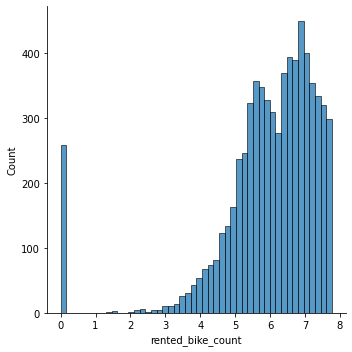

In [124]:
sns.displot(y)

After yeo johnson transformation accuracy reduced to 83.5%, so reverting back to log transformation

In [125]:
# apply yeo johnson accuracy reduced 
#from scipy import stats

#X = df1[independent_var]
#m , lamda= stats.yeojohnson(df1[dependent_var])
#y = m

In [126]:
y

0       5.541264
1       5.323010
2       5.159055
3       4.682131
4       4.369448
          ...   
6836    6.911747
6837    6.639876
6838    6.543912
6839    6.569481
6840    6.371612
Name: rented_bike_count, Length: 6841, dtype: float64

#Data Dictionay (continued)


**X_train, X_test, y_train, y_test** : Split of dataframe into test and train set, dataframe after 20%

**convert_log_toactual** : It is a function that converts log transformed value of "y" into actual value

**reg** = It is Linear regression model

**r2_score_lr** : It contains r2 score of reg (Linear regression) model.

**aj_r2_score_lr** : It contains adjusted r2 score of reg (Linear regression) model.

**lasso** = It is Lasso linear regression model

**r2_score_lasso**: It contains r2 score of Lasso (Linear regression) model.

**adj_r2_score_lasso** : It contains adjusted r2 score of reg (Linear regression) model.

**lasso_regressor** : It is It is lasso linear regression model with hyperparameter tuning with CV

**lasso_optimum_model** : It is lasso ML model with best estimator lasso linear regression model with hyperparameter tuning with CV

**r2_score_lasso_cv** : It contains r2 score of Lasso (Linear regression) model with cv

**aj_r2_score_lasso_cv** : It contains ajusted r2 score of Lasso (Linear regression) model with cv

**rf** : It is a random forest regessor ML model.

**rf_cv** : It is a random forest regessor ML model with hyper parameter tuning with CV

**rf_cv_optimal_model** : It is random forest ML model with best estimator of random forest regression model with hyperparameter tuning with CV

**r2_rf_cv** : It contains r2 score of random forest regessor ML model with hyper parameter tuning with CV

**xgb** : It is a XG Boost regressor ML model.

**r2_xgb** : It is r2 score of xgb model

**adj_r2_xgb** : It is adjusted r2 score of xgb model

**xgb_cv**: It is xgb ML model with hyper parameter tuning with CV  

**xgb_cv_optimal**: It is xgb_cv model with best estimator

**r2_xgb_cv** : It is r2 score of xgb_cv model.

**aj_r2_xgb_cv** : It is adjusted r2 score of xgb_cv_model







In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 6567 to 2732
Data columns (total 86 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_12               5472 non-null   uint8  
 1   hour_7               5472 non-null   uint8  
 2   day_5                5472 non-null   uint8  
 3   day_25               5472 non-null   uint8  
 4   hour_1               5472 non-null   uint8  
 5   month_7              5472 non-null   uint8  
 6   hour_5               5472 non-null   uint8  
 7   hour_17              5472 non-null   uint8  
 8   day_20               5472 non-null   uint8  
 9   day_30               5472 non-null   uint8  
 10  hour_11              5472 non-null   uint8  
 11  seasons_Spring       5472 non-null   uint8  
 12  week_day_5           5472 non-null   uint8  
 13  seasons_Winter       5472 non-null   uint8  
 14  month_11             5472 non-null   uint8  
 15  week_day_4           5472 non-null 

In [129]:
X_train.head()

,day_12,hour_7,day_5,day_25,hour_1,month_7,hour_5,hour_17,day_20,day_30,...,day_26,month_6,day_3,hour_15,day_24,hour_0,month_9,week_day_3,hour_23,day_15
6567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
X_test.head()

,day_12,hour_7,day_5,day_25,hour_1,month_7,hour_5,hour_17,day_20,day_30,...,day_26,month_6,day_3,hour_15,day_24,hour_0,month_9,week_day_3,hour_23,day_15
6814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4597,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6563,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
y_train.head()

6567    6.469250
348     5.631212
5758    7.237059
2364    7.325149
1933    7.103322
Name: rented_bike_count, dtype: float64

In [132]:
y_test.head()

6814    6.675823
4597    6.935370
6563    4.867534
6448    6.527958
3960    7.635787
Name: rented_bike_count, dtype: float64

In [133]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5472, 86) (5472,)
(1369, 86) (1369,)


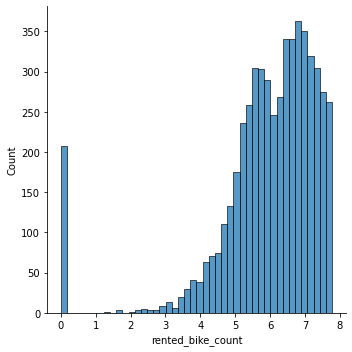

In [134]:
sns.displot(y_train)

Revert np log value

In [135]:
np.log(5)+1

2.6094379124341005

In [136]:
np.exp(2.6094379124341005-1)

5.000000000000001

In [137]:
def convert_log_toactual(input_pred):
  '''reverse log transformed value to actual value'''
  y_actual = np.exp(input_pred-1)
  return y_actual  

In [138]:
from sklearn.preprocessing import MinMaxScaler
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [139]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [140]:
#regressor coefficient

reg.coef_

array([ 4.10045264e+12,  2.27697794e+11,  4.10045264e+12,  4.10045264e+12,
        2.27697794e+11,  1.14868629e+13,  2.27697794e+11,  2.27697794e+11,
        4.10045264e+12,  4.10045264e+12,  2.27697794e+11,  6.90748844e+12,
       -1.20538055e+12,  6.90748844e+12,  1.14868629e+13, -1.20538055e+12,
        4.10045264e+12,  6.90748844e+12,  2.27697794e+11,  4.10045264e+12,
       -1.20538055e+12,  1.89399638e+12,  2.27697794e+11,  4.10045264e+12,
        4.10045264e+12, -9.54598427e-01,  1.14868629e+13,  4.10045264e+12,
        4.10045264e+12,  4.10045264e+12,  4.10045264e+12,  1.14868629e+13,
        2.27697794e+11,  1.14868629e+13,  4.10045264e+12,  2.27697794e+11,
        4.10045264e+12,  1.14868629e+13, -1.53808594e-01, -1.36185000e+12,
        1.14868629e+13,  4.10045264e+12, -5.15136719e-02,  4.10045264e+12,
       -1.36185000e+12,  6.90748844e+12,  4.10045264e+12,  4.10045264e+12,
        2.27697794e+11,  2.03906250e+00,  2.27697794e+11,  2.27697794e+11,
       -1.20538055e+12,  

In [141]:
#intercept

reg.intercept_

-22049267602008.004

In [142]:
#score on train set

reg.score(X_train,y_train)

0.9045010760036966

In [143]:
#score on test set

reg.score(X_test,y_test)

0.9086815105433853

In [144]:
y_pred_lr = reg.predict(X_test) 

In [145]:
y_pred_lr

array([6.79296875, 6.609375  , 4.7421875 , ..., 7.46484375, 6.27734375,
       7.2421875 ])

In [146]:
y_pred_lr_actual = convert_log_toactual(y_pred_lr)
y_pred_lr_actual

array([327.98528678, 272.97357619,  42.19018031, ..., 642.16401748,
       195.84896002, 513.98161688])

In [147]:
from sklearn.metrics import mean_squared_error

MSE= mean_squared_error((y_test), (y_pred_lr))

print("MSE :" , MSE)

RMSE= np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.21352534073192955
RMSE : 0.4620880227098832


In [148]:
from sklearn.metrics import r2_score
r2_score_lr = r2_score((y_test),(y_pred_lr))
print("R2 :" ,r2_score_lr)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9086815105433853
Adjusted R2 :  0.9025556212350633


In [149]:
r2_score_lr
aj_r2_score_lr = 1-(1-r2_score((y_test), (y_pred_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_score_lr

0.9025556212350633

Lasso Regression

In [150]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [151]:
lasso.score(X_train, y_train)

0.9037893838961908

In [152]:
lasso.score(X_test, y_test)

0.9085349433456957

In [153]:
lasso.coef_

array([ 3.43021818e-01,  4.93014962e-02,  1.89603763e-01,  1.75351216e-02,
       -2.22558208e-01, -3.74450476e-02, -1.22868258e+00,  3.03179385e-01,
        1.30572230e-02,  0.00000000e+00, -5.01062251e-02, -0.00000000e+00,
       -7.05489955e-02, -6.62538180e-01,  3.24893958e-02,  5.74035642e-03,
        2.12364156e-01,  1.82455884e-02, -5.15644182e-01,  1.58253900e-02,
       -0.00000000e+00,  6.32900353e+00, -2.18330106e-02,  6.36219344e-03,
        7.01015021e-02, -8.84179269e-01, -1.35659192e-01, -6.22189797e-02,
        1.21920859e-03, -1.14404019e-01, -0.00000000e+00,  5.74602755e-02,
       -0.00000000e+00, -2.92903415e-02, -1.60468197e-01,  3.53234034e-01,
       -0.00000000e+00,  2.44128055e-03, -1.08390794e-01,  3.10424596e-01,
        1.14738414e-01, -3.02374852e-01, -7.15353207e-03,  0.00000000e+00,
       -3.03264189e-02,  1.62285881e-01, -5.84616507e-02,  5.16653958e-02,
        5.47724106e-01,  1.99064107e+00, -0.00000000e+00,  4.27663995e-01,
       -9.41238451e-03, -

In [154]:
lasso.intercept_

-0.6478638786147863

In [155]:
y_pred_lasso = lasso.predict(X_test)

In [156]:
#actual predicted value
y_pred_lasso_actual = convert_log_toactual(y_pred_lasso)
y_pred_lasso_actual

array([316.43071089, 283.12024012,  43.36063028, ..., 642.82501838,
       192.55350303, 514.77768967])

In [157]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_lasso))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.21386805129375566
RMSE : 0.46245870225756985


In [158]:
from sklearn.metrics import r2_score
r2_score_lasso= r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2_score_lasso)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9085349433456957
Adjusted R2 :  0.9023992219164678


In [159]:
r2_score_lasso
adj_r2_score_lasso = 1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


Lasso regression model Hyper parameter tuning

In [160]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter=30000)
parameters = {'alpha': [0.001,0.01,0.1,1,10,100,1000,10000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=30000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error')

In [161]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.23850838784904088


In [162]:
lasso_optimum_model = lasso_regressor.best_estimator_
lasso_optimum_model

Lasso(alpha=0.001, max_iter=30000)

In [163]:
lasso_optimum_model.score(X_train,y_train)

0.9037893838961908

In [164]:
lasso_optimum_model.score(X_test,y_test)

0.9085349433456957

In [165]:
y_pred_lasso_cv = lasso_optimum_model.predict(X_test)

In [166]:
y_pred_lasso_cv_actual = convert_log_toactual(y_pred_lasso_cv)
y_pred_lasso_cv_actual

array([316.43071089, 283.12024012,  43.36063028, ..., 642.82501838,
       192.55350303, 514.77768967])

In [167]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_lasso_cv))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.21386805129375566
RMSE : 0.46245870225756985


In [168]:
from sklearn.metrics import r2_score
r2_score_lasso_cv = r2_score((y_test),(y_pred_lasso_cv))
print("R2 :" ,r2_score_lasso_cv)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9085349433456957
Adjusted R2 :  0.9023992219164678


In [169]:
r2_score_lasso_cv
aj_r2_score_lasso_cv = 1-(1-r2_score((y_test), (y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_score_lasso_cv

0.9023992219164678

Random forest reggresion model

In [170]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [171]:
rf.score(X_train,y_train)

0.7260714392059255

In [172]:
rf.score(X_test,y_test)

0.7209605706898132

In [173]:
y_pred_rf = rf.predict(X_test)

In [174]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_rf))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.6524635873374597
RMSE : 0.8077521818834411


In [175]:
from sklearn.metrics import r2_score
r2_rf = r2_score((y_test),(y_pred_rf))
print("R2 :" ,r2_rf)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7209605706898132
Adjusted R2 :  0.7022418570231392


In [176]:
r2_rf
aj_r2_rf = 1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Random forest regression model hyper parameter tuning

In [177]:
#Cross validation using grid search cv


from sklearn.model_selection import GridSearchCV

parameters_dict = {
    'n_estimators' : [600,800],
    'max_depth':[11,13],
    'min_samples_split' : [3,5]
    }
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf,param_grid = parameters_dict,cv = 5,verbose = 2)
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  12.1s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  11.9s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  14.2s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  12.0s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  11.9s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.9s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.8s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.8s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.8s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.8s
[CV] END max_depth=11, min_samples_split=5, n_estimators=600; total time=  11.7s
[CV] END max_depth=11, min_samples_split=5, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [11, 13], 'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             verbose=2)

In [178]:
rf_cv_optimal_model = rf_cv.best_estimator_
rf_cv_optimal_model

#1st attempt

#RandomForestRegressor(max_depth=9, min_samples_split=5, n_estimators=50,verbose=2) first instance
#parameters_dict = {
    #'n_estimators' : [50,100,150,200],
    #'max_depth':[3,5,7,9],
    #'min_samples_split' : [2,3,5,7],
    #'verbose' : [2]
    #}

#RandomForestRegressor(max_depth=13, min_samples_split=3, n_estimators=70)
#RandomForestRegressor(max_depth=13, min_samples_split=3, n_estimators=800)

RandomForestRegressor(max_depth=13, min_samples_split=3, n_estimators=600)

In [179]:
#two percent increase in accuracy w.r.t. to lasso cv
 
rf_cv_optimal_model.score(X_train,y_train)

0.9566425870563892

In [180]:
#accuracy decreased by 0.5 % w.r.t to lasso cv 

rf_cv_optimal_model.score(X_test,y_test)

0.921096056801531

In [181]:
y_pred_rf_cv = rf_cv_optimal_model.predict(X_test)

In [182]:
y_pred_rf_cv_actual = convert_log_toactual(y_pred_rf_cv)
y_pred_rf_cv_actual

array([274.85502122, 421.80291344,  54.30593611, ..., 484.42120795,
       133.79116735, 477.29794055])

In [183]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_rf_cv))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.18449704388233876
RMSE : 0.4295311908142862


In [184]:
from sklearn.metrics import r2_score
r2_rf_cv = r2_score((y_test),(y_pred_rf_cv))
print("R2 :" ,r2_rf_cv)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.921096056801531
Adjusted R2 :  0.9158029685682483


In [185]:
r2_rf_cv
aj_r2_rf_cv = 1-(1-r2_score((y_test), (y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_rf_cv

0.9023992219164678

XG boost ML model

In [186]:
import xgboost as xg

In [187]:
xgb= xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 800)

xgb.fit(X_train, y_train)

[14:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=800)

In [188]:
xgb.score(X_train, y_train)

0.9769631338576494

In [189]:
xgb.score(X_test, y_test)

0.9404429144457527

In [190]:
y_pred_xgb = xgb.predict(X_test)

In [191]:
y_pred_xgb

array([6.6945877, 7.035654 , 4.8082757, ..., 7.312855 , 6.324111 ,
       7.1514726], dtype=float32)

In [192]:
#actual predicted value
y_pred_xgb_actual = convert_log_toactual(y_pred_xgb)

In [193]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_xgb))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.1392592788343609
RMSE : 0.37317459564439925


In [194]:
from sklearn.metrics import r2_score
r2_xgb = r2_score((y_test),(y_pred_xgb))
print("R2 :" ,r2_xgb)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9404429144457527
Adjusted R2 :  0.9364476653368095


In [195]:
r2_xgb
aj_r2_xgb = 1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_xgb

0.9364476653368095

XG boost regression model hyper parameter tuning

In [196]:
#Cross validation using grid search cv

from sklearn.model_selection import GridSearchCV

parameters_dict = {
    'n_estimators' : [600,700.800,900,1000,1200,1400]
    }
xgb= xg.XGBRegressor(objective ='reg:linear')
xgb_cv = GridSearchCV(xgb,param_grid = parameters_dict,cv = 5,verbose = 2)
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[14:22:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ...................................n_estimators=600; total time=   4.8s
[14:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ...................................n_estimators=600; total time=   4.7s
[14:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ...................................n_estimators=600; total time=   4.8s
[14:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END ...................................n_estimators=600; total time=   4.7s
[14:23:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 62

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'n_estimators': [600, 700.8, 900, 1000, 1200, 1400]},
             verbose=2)

In [197]:
#best params for XG boost
xgb_cv_optimal = xgb_cv.best_estimator_
xgb_cv_optimal

XGBRegressor(n_estimators=1400)

In [198]:
#Score for train set

xgb_cv_optimal.score(X_train, y_train)

0.984610952200493

In [199]:
#Score for test set

xgb_cv_optimal.score(X_test, y_test)

0.9433825852540094

In [200]:
y_pred_xgb_cv = xgb_cv_optimal.predict(X_test)

In [201]:
y_pred_xgb_cv_actual = convert_log_toactual(y_pred_xgb_cv)

In [202]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred_xgb_cv))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.13238559734107525
RMSE : 0.36384831639170084


In [203]:
from sklearn.metrics import r2_score
r2_xgb_cv = r2_score((y_test),(y_pred_xgb_cv))
print("R2 :" ,r2_xgb)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9404429144457527
Adjusted R2 :  0.9395845371509243


In [204]:
r2_xgb_cv
aj_r2_xgb_cv = 1-(1-r2_score((y_test), (y_pred_xgb_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
aj_r2_xgb_cv

0.9395845371509243

# Creating data frame name of ML model, r2 score, adjusted r2 score

In [205]:
adj_r2_score_lasso

0.9023992219164678

In [206]:
score_df = pd.DataFrame()
score_df['name_of_model'] = ['linear regression','lasso regression','lasso regression cv','random forest','random forest cv','xg boost','xg boost cv']
score_df['r2_score'] = [r2_score_lr,r2_score_lasso,r2_score_lasso_cv,r2_rf,r2_rf_cv,r2_xgb,r2_xgb_cv]
score_df['adj_r2_score'] = [aj_r2_score_lr,adj_r2_score_lasso,aj_r2_score_lasso_cv,aj_r2_rf,aj_r2_rf_cv,aj_r2_xgb,aj_r2_xgb_cv]

In [207]:
score_df

,name_of_model,r2_score,adj_r2_score
0,linear regression,0.908682,0.902556
1,lasso regression,0.908535,0.902399
2,lasso regression cv,0.908535,0.902399
3,random forest,0.720961,0.702242
4,random forest cv,0.921096,0.902399
5,xg boost,0.940443,0.936448
6,xg boost cv,0.943383,0.939585


**Conclusion** : It is found out that demand for bike rises with rise in temperature. At night demand for rental bike is most, In summer season the demand for rental bike is most, In monthly period it is seen that rental bike demand is low on January, February and December and high between may to august, It can be seen that bike demand rises after 5 AM and peaks at 8 AM, then again rises after 2 PM and peaks at 5PM then demand remain significantly above average demand 6PM and 11PM.That means in this 11 hours of a day bike demand is most. *XG boost regression model* can predict rental bike demand with *94.14% accuracy*.

In [6]:
import requests

In [12]:
import requests
r = requests.post('http://127.0.0.1:5000/predict', json={
  "hour": 0,
  "temp": -5.2,
  "humidity": 37,
  "wind_speed": 2.2,
  "visibility": 2000,
  "seasons": "Winter",
  "holiday": "No Holiday",
  "functioning_day": "Yes",
  "day": 12,
  "month":1,
  "week":3
})
print(f"Status Code: {r.status_code}, Response: {r}")

Status Code: 500, Response: <Response [500]>
